In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords 
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Somesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [4]:
spamData=pd.read_excel('spam.xls')
spamData.head()
spamData.info()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
type    5571 non-null object
text    5571 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
spamData.shape

(5571, 2)

In [6]:
spamData.iloc[10,1]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [7]:
#TFIDF Vectorizer
stopset = set(stopwords.words('english'))

In [8]:
stopset

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)

In [10]:
vectorizer?

In [11]:
vectorizer.fit(spamData)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={"isn't", 'he', 'me', 'have', 'or', 'is', 'yourselves', "she's", 'been', 'will', "you'd", "shouldn't", "hadn't", "wouldn't", 'i', 'until', 've', "mightn't", 'your', 'shan', "don't", 'where', 'few', 'than', 'whom', 'there', "hasn't", 'himself', 'our', 'under', 'those', 'ours', 'at', 'ma', ...t', 'didn', "it's", 'more', 'be', 'it', 'of', "didn't", 'what', 'ain', 'the', 'only', 'how', 'from'},
        strip_accents='ascii', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [12]:
# printing the vocabulary
print(vectorizer.vocabulary_)

{'type': 1, 'text': 0}


## convert the spam and ham to 1 and 0 values respectiviely for probability testing

In [13]:
spamData.type.replace('spam', 1, inplace = True)
spamData.type.replace('ham', 0, inplace = True)

In [14]:
spamData.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
spamData.shape

(5571, 2)

In [18]:
# Our dependent variable will be 'spam' or 'ham'
y= spamData.type

In [19]:
# convert spam.txt from text to features
X = vectorizer.fit_transform(spamData.text)

In [20]:
X.shape

(5571, 8497)

In [21]:
spamData.iloc[0,1]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)

### IDF(t) = log e (Total number of documents /Number of documents with term t in it)

In [22]:
spamData.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [24]:
##Spliting the SMS to sepearate the text into indiviual words
splt_txt1 = spamData.text[0].split()
print(splt_txt1)

['Go', 'until', 'jurong', 'point,', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'there', 'got', 'amore', 'wat...']


In [25]:
# Finding the most frequent word in the string
max(splt_txt1)

'world'

In [27]:
# Counting the frequency of the words
len(splt_txt1)

20

In [28]:
X[0]

<1x8497 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

0 is the first SMS 3536, 4316 etc are the positions of the elements or the words & 0.15,0 are the tf_idf value of the words. Like wise we can find the next SMSes & the tf_id values the words of the SMSes

In [29]:
print(X)

  (0, 3517)	0.15763703201309628
  (0, 4294)	0.3464036267836728
  (0, 5827)	0.2709397885087744
  (0, 2320)	0.2682641938013108
  (0, 1310)	0.2590968617297348
  (0, 1749)	0.29264210366312027
  (0, 3601)	0.19243276280833024
  (0, 8338)	0.23540535459027698
  (0, 4417)	0.29264210366312027
  (0, 1747)	0.33067938928008445
  (0, 2045)	0.29264210366312027
  (0, 3561)	0.16273033954531774
  (0, 1081)	0.3464036267836728
  (0, 8126)	0.1935461620000755
  (1, 5421)	0.2725670559077506
  (1, 4453)	0.40824317753566136
  (1, 4263)	0.523577855311854
  (1, 8244)	0.43154287820118004
  (1, 5448)	0.5465177780550677
  (2, 3328)	0.115550708390781
  (2, 2928)	0.3595055896424161
  (2, 8297)	0.19028830276484382
  (2, 2161)	0.1942247794586573
  (2, 8256)	0.14791310882807326
  (2, 3062)	0.4691227618101517
  :	:
  (5566, 5340)	0.32437487859641606
  (5567, 3850)	0.3385597132991974
  (5567, 3530)	0.3372099503033233
  (5567, 3960)	0.3775860809145165
  (5567, 3315)	0.5181856154986743
  (5567, 2960)	0.6004824638047908
  (5

In [32]:
max(vectorizer.get_feature_names())

'zyada'

In [33]:
print(y.shape)
print(X.shape)

(5571,)
(5571, 8497)


In [39]:
#Split the test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(4178, 8497)

(1393, 8497)

(4178,)

(1393,)

In [40]:
## Train Naive Bayes Classifier
## Fast (One pass)
## Not affected by sparse data, so most of the 8605 words dont occur in a single observation
clf = naive_bayes.MultinomialNB()
model = clf.fit(X_train,y_train)

In [41]:
predicted_class = model.predict(X_test)
print(predicted_class)

[0 1 0 ... 0 0 0]


In [42]:
print(y_test)

1168    0
765     1
465     0
1117    1
4934    0
1433    0
4801    0
611     0
230     0
926     0
3208    0
1561    0
4614    0
2450    0
1039    0
1858    0
5505    0
439     0
903     0
4041    0
2499    0
1002    0
290     0
2973    0
734     0
3382    1
79      0
1115    0
1558    0
2226    0
       ..
5079    0
257     0
507     0
4003    0
99      0
2650    0
2589    0
5273    0
4904    0
4340    0
5313    1
5412    0
4024    0
4217    0
4561    0
366     1
3783    0
1662    0
4317    0
3130    0
949     0
1643    0
19      1
4002    0
668     0
218     0
4657    0
2970    0
3543    0
4066    1
Name: type, Length: 1393, dtype: int64


In [43]:
roc_auc_score(y_test, predicted_class)

0.9128205128205128

In [44]:
metrics.accuracy_score(y_test, predicted_class)

0.9755922469490309

Confusion Matrix


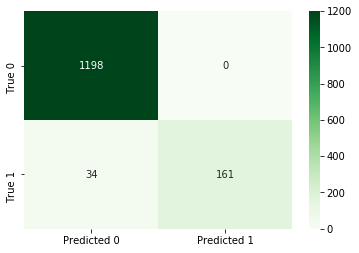

In [45]:
#Confusion Matrix
print("Confusion Matrix")
cf = metrics.confusion_matrix(y_test, predicted_class)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Greens", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

In [46]:
#Check for null in spamm
spamData[spamData.type.isnull()]

,type,text


### Find the probability of assigning a SMS to a specific class

In [47]:
prd = model.predict_proba(X_test)
prd

array([[0.99880478, 0.00119522],
       [0.1000585 , 0.8999415 ],
       [0.99317185, 0.00682815],
       ...,
       [0.92381687, 0.07618313],
       [0.98616857, 0.01383143],
       [0.84576309, 0.15423691]])